In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import math

In [2]:
data = pd.read_csv("college_student_placement_dataset.csv")

In [3]:
data.head()


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
no_yes_dict = {"No":0,"Yes":1}
data[data.columns[5]] = data[data.columns[5]].map(no_yes_dict)
data[data.columns[-1]] =data[data.columns[-1]].map(no_yes_dict)

In [5]:
data[data.columns[0]] = data[data.columns[0]].apply(lambda x: int(x[3:]))
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [6]:
corr_matrix = data.corr()
corr_matrix

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,0.002473,-0.004060,-0.003422,-0.015442,0.012037,-0.003931,-0.005194,0.004903,0.002750
IQ,0.002473,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.004060,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.003422,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.015442,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,0.012037,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003931,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.005194,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.004903,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.002750,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


In [7]:
feature_selected_data = data[[data.columns[1],data.columns[2],
                             data.columns[3],data.columns[7],
                             data.columns[8],data.columns[9]]]
feature_selected_data.head()

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0


In [8]:
placement_equals_1_prior = data[data[data.columns[-1]] == 1].shape[0]/data.shape[0]
placement_equals_1_prior

0.1659

<Axes: >

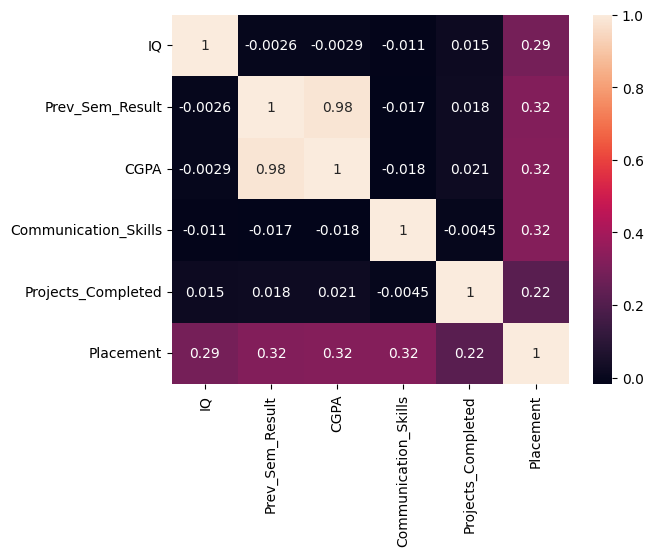

In [9]:
sns.heatmap(feature_selected_data.corr(),annot=True)

<Axes: >

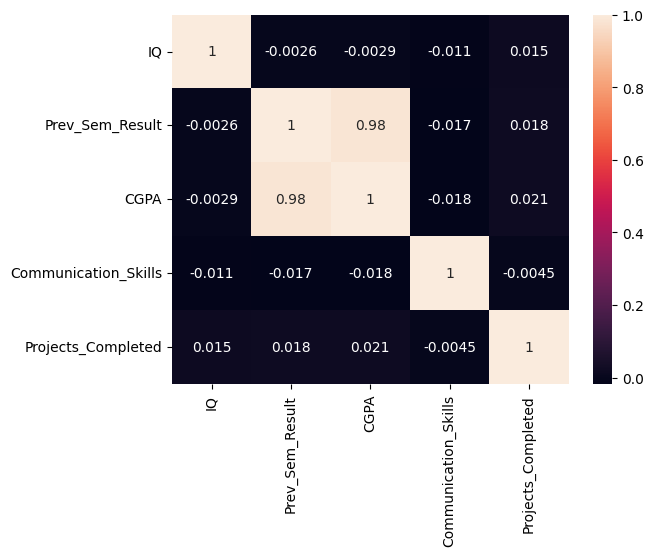

In [10]:
sns.heatmap(feature_selected_data.iloc[:,0:-1].corr(),annot=True)

In [11]:
X = np.array(feature_selected_data.iloc[:,0:-1])
cov_mat = np.cov(X,rowvar=False)
F = np.linalg.svd(cov_mat)

In [12]:
E = F[0]
lamda = F[1]
new_X = np.matmul(X,F[0])
new_cov_mat = np.cov(new_X,rowvar=False)

In [13]:
new_input_features = pd.DataFrame(data=new_X,
                            columns=["Input_feat_1", "Input_feat_2","Input_feat_3",
                                     "Input_feat_4","Input_feat_5"])

In [14]:
new_input_features

,Input_feat_1,Input_feat_2,Input_feat_3,Input_feat_4,Input_feat_5
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179
...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777


<Axes: >

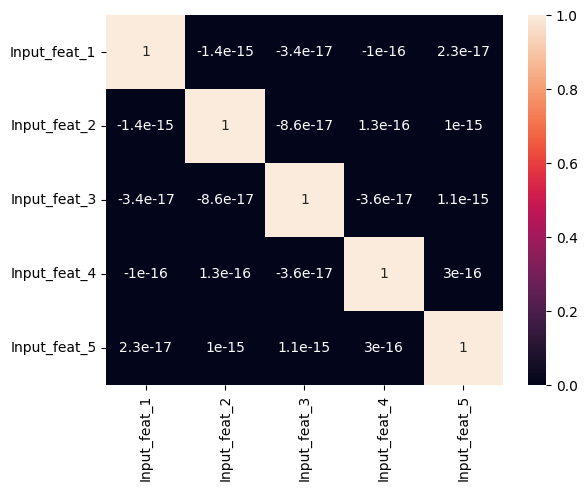

In [15]:
sns.heatmap(new_input_features.corr(),annot=True)

In [16]:
new_data = pd.concat([new_input_features,feature_selected_data[data.columns[-1]]],
                     axis=1)
new_data

,Input_feat_1,Input_feat_2,Input_feat_3,Input_feat_4,Input_feat_5,Placement
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328,0
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169,0
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885,0
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325,0
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179,0
...,...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895,1
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127,0
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864,0
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777,0


(array([  3.,  22., 101., 362., 572., 236., 208., 109.,  38.,   8.]),
 array([-157.98374855, -147.7834374 , -137.58312626, -127.38281511,
        -117.18250397, -106.98219282,  -96.78188168,  -86.58157053,
         -76.38125939,  -66.18094824,  -55.98063709]),
 <BarContainer object of 10 artists>)

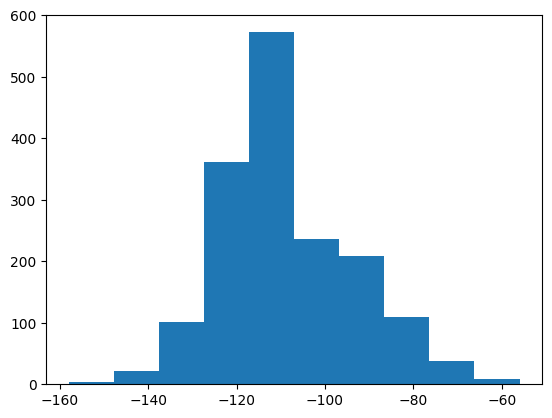

In [17]:
plt.hist(new_data[new_data[new_data.columns[-1]] == 1][new_data.columns[0]])

In [18]:
new_data[new_data[new_data.columns[-1]] == 1][new_data.columns[0]]

6      -122.981852
7      -110.996007
18      -85.982336
20     -120.993575
23      -77.976418
           ...    
9964   -122.993803
9978    -83.981477
9992   -108.977394
9994   -116.992906
9995   -118.977579
Name: Input_feat_1, Length: 1659, dtype: float64

In [19]:
class GaussianMLEstimatorNN(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.mu = torch.nn.Parameter(data=torch.tensor([-90.0]))
        self.log_sigma = torch.nn.Parameter(data=torch.tensor([1.0]))

    def forward(self,x):

        g = -self.mu
        h = (x + g)
        i = h**2
        sigma = torch.exp(self.log_sigma)
        j = (-1/(2*sigma**2))*i
        k = torch.exp(j)
        l = (1/(math.sqrt(2*math.pi)*sigma))*k
        f = torch.log(l)

        return -torch.mean(f)

In [20]:
MLEstimatorNN = GaussianMLEstimatorNN()
optimizer = torch.optim.SGD(params=MLEstimatorNN.parameters(),lr=0.1)
x = torch.tensor(new_data[new_data[new_data.columns[-1]] == 1][new_data.columns[0]].values)
tol = 10**(-8)

In [21]:
epoch = 0
while True:

    initial_loss_function_value = MLEstimatorNN(x)
    optimizer.zero_grad()
    initial_loss_function_value.backward()
    optimizer.step()
    final_loss_function_value = MLEstimatorNN(x)

    if torch.abs(initial_loss_function_value - final_loss_function_value) < tol:
        break

    epoch += 1

    print("The value of the Gaussian NLL after Epoch # {} is {}".format(epoch,initial_loss_function_value.item()))

The value of the Gaussian NLL after Epoch # 1 is 42.26602906631197
The value of the Gaussian NLL after Epoch # 2 is 9.888361837868734
The value of the Gaussian NLL after Epoch # 3 is 9.788363461747323
The value of the Gaussian NLL after Epoch # 4 is 9.68836625249935
The value of the Gaussian NLL after Epoch # 5 is 9.588369440294134
The value of the Gaussian NLL after Epoch # 6 is 9.48837277249125
The value of the Gaussian NLL after Epoch # 7 is 9.388377625607717
The value of the Gaussian NLL after Epoch # 8 is 9.28838297958875
The value of the Gaussian NLL after Epoch # 9 is 9.188389844557458
The value of the Gaussian NLL after Epoch # 10 is 9.088397513361128
The value of the Gaussian NLL after Epoch # 11 is 8.988407106843695
The value of the Gaussian NLL after Epoch # 12 is 8.888419317617034
The value of the Gaussian NLL after Epoch # 13 is 8.788434341147953
The value of the Gaussian NLL after Epoch # 14 is 8.688452512690567
The value of the Gaussian NLL after Epoch # 15 is 8.58847465

In [22]:
list(MLEstimatorNN.parameters())

[Parameter containing:
 tensor([-108.8365], requires_grad=True),
 Parameter containing:
 tensor([2.7219], requires_grad=True)]